
# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, you will see detailed analysis of TMDb data. 

> Firstly, I would like to explore the whole movie market by investigating the investment and revenue of film industry over years.
Secondly, I would like to explore the main factors related to movie revenue, is there any correlations between revenue, investment and movie rate? What plays a key role in ROI growth?
Thirdly, I will draw my conclusion over this analysis.

In [2]:
# Set up import statements for all of the packages
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling
> There are two sections in this part,

> Firstly, I will assess the data by using df.head(), df.info(), df.describe(), df.shape() to see the data structure,  index, columns , statistics,  data types and shape of this dataset. in addition, I will detect the null cell and duplicated row by using df.duplicated().sum() and df.isnull().sum().

> Then I will clean the data in the Data Cleaning section.

### Assessing Data

In [3]:
# I would like to explore the index columns and data of TMDb data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=10866, step=1)

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.size

228186

In [12]:
df.shape

(10866, 21)

### Tiding Data into Standard Format

In [13]:
# Select useful columns, as we can see from df.describe(), budget_adj and revenue_adj columns are the same with
# revenue and budget columns considering inflation factor, so I will delete revenue and budget columns, 
# I will also deletehomepage, id,imdb_id and tagline in my new dataframe df_movie
df_movie = df.drop(['imdb_id','budget','revenue','overview','runtime','homepage','tagline'],axis = 1)
df_movie.head(3)

,id,popularity,original_title,cast,director,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [14]:
# drop duplicates and check the change
df_movie.drop_duplicates(inplace = True)
df_movie.duplicated().sum()

0

In [15]:
# drop null cell and check the change
df_movie.dropna(inplace = True)
df_movie.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
keywords                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
# convert release_date to month column in order to analyze the budget and revenue change over time 
# in the next section
df_movie['release_date']=pd.to_datetime(df_movie['release_date'])
df_movie['release_month'] = df_movie['release_date'].dt.month
df_movie.drop(['release_date'],axis = 1,inplace= True)
df_movie = df_movie[['id','original_title','director','cast','genres','keywords','production_companies','release_year','release_month','vote_count','vote_average','popularity','budget_adj','revenue_adj']]
df_movie.head(3)


,id,original_title,director,cast,genres,keywords,production_companies,release_year,release_month,vote_count,vote_average,popularity,budget_adj,revenue_adj
0,135397,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island,Universal Studios|Amblin Entertainment|Legenda...,2015,6,5562,6.5,32.985763,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,future|chase|post-apocalyptic|dystopia|australia,Village Roadshow Pictures|Kennedy Miller Produ...,2015,5,6185,7.1,28.419936,1.379999e+08,3.481613e+08
2,262500,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,based on novel|revolution|dystopia|sequel|dyst...,Summit Entertainment|Mandeville Films|Red Wago...,2015,3,2480,6.3,13.112507,1.012000e+08,2.716190e+08


In [17]:
# check whether there is 0 value in revenue_adj and budget_adj.
df_movie[df_movie['revenue_adj']==0].sum()
df_movie[df_movie['budget_adj']==0].sum()

id                                                              293707604
original_title          Mr. HolmesSolaceBeyond the ReachMythica: The D...
director                Bill CondonAfonso PoyartJean-Baptiste LÃ©onett...
cast                    Ian McKellen|Milo Parker|Laura Linney|Hattie M...
genres                  Mystery|DramaCrime|Drama|MysteryThrillerAction...
keywords                london|detective|sherlock holmesthriller|seria...
production_companies    BBC Films|See-Saw Films|FilmNation Entertainme...
release_year                                                      7877401
release_month                                                       26788
vote_count                                                         205696
vote_average                                                      23324.1
popularity                                                        1464.71
budget_adj                                                              0
revenue_adj                           

In [18]:
# replace 0 value in revenue_adj and budget_adj
df_movie['revenue_adj'].replace(0,df_movie['revenue_adj'].mean(),inplace=True)
df_movie['budget_adj'].replace(0,df_movie['budget_adj'].mean(),inplace=True)

In [19]:
# creat a column name roi （return of investment = revenue  budget / investment）
df_movie['roi']=(df_movie['revenue_adj']-df_movie['budget_adj'])/df_movie['budget_adj']
df_movie.roi.describe()
df_movie.head(3)
df_movie.to_csv('movieclean.csv',index = False)

In [20]:
# seperate genres column in the data set, do the same to cast company and keywords columns
split_genres=df_movie['genres'].str.split('|',expand=True)
split_genres['id']=df_movie['id']
df_genre=df_movie.merge(split_genres)
df_genre.head(3)

df_meltg=pd.melt(df_genre,id_vars=['id','original_title','budget_adj','revenue_adj','roi','release_year','release_month','vote_average','popularity'],
                value_vars=[0,1,2,3,4],value_name='genres').drop('variable',axis=1).dropna()
df_meltg.head(3)

,id,original_title,budget_adj,revenue_adj,roi,release_year,release_month,vote_average,popularity,genres
0,135397,Jurassic World,1.379999e+08,1.392446e+09,9.090192,2015,6,6.5,32.985763,Action
1,76341,Mad Max: Fury Road,1.379999e+08,3.481613e+08,1.522909,2015,5,7.1,28.419936,Action
2,262500,Insurgent,1.012000e+08,2.716190e+08,1.683984,2015,3,6.3,13.112507,Adventure


In [21]:
# Repeat the same method above to cast,company and keywords columns
split_cast =df_movie['cast'].str.split('|',expand=True)
split_cast['id']=df_movie['id']
df_mergcast=df_movie.merge(split_cast)

df_meltcast=pd.melt(df_mergcast,id_vars=['id','original_title','budget_adj','revenue_adj','release_year','vote_average'],
                value_vars=[0,1,2,3,4],value_name='cast').drop('variable',axis=1).dropna()
df_meltcast.head(3)

,id,original_title,budget_adj,revenue_adj,release_year,vote_average,cast
0,135397,Jurassic World,1.379999e+08,1.392446e+09,2015,6.5,Chris Pratt
1,76341,Mad Max: Fury Road,1.379999e+08,3.481613e+08,2015,7.1,Tom Hardy
2,262500,Insurgent,1.012000e+08,2.716190e+08,2015,6.3,Shailene Woodley


In [22]:
split_kwd=df_movie['keywords'].str.split('|',expand=True)
split_kwd['id']=df_movie['id']
df_mergkwd=df_movie.merge(split_kwd)

df_meltkwd=pd.melt(df_mergkwd,id_vars=['id','original_title','budget_adj','revenue_adj','release_year','vote_average'],
                value_vars=[0,1,2,3,4],value_name='keywords').drop('variable',axis=1).dropna()
df_meltkwd.head(3)

,id,original_title,budget_adj,revenue_adj,release_year,vote_average,keywords
0,135397,Jurassic World,1.379999e+08,1.392446e+09,2015,6.5,monster
1,76341,Mad Max: Fury Road,1.379999e+08,3.481613e+08,2015,7.1,future
2,262500,Insurgent,1.012000e+08,2.716190e+08,2015,6.3,based on novel


In [23]:
split_pc =df_movie['production_companies'].str.split('|',expand=True)
split_pc['id']=df_movie['id']
df_mergpc=df_movie.merge(split_pc)

df_meltpc=pd.melt(df_mergpc,id_vars=['id','original_title','budget_adj','revenue_adj','release_year','vote_average'],
                value_vars=[0,1,2,3,4],value_name='production_companies').drop('variable',axis=1).dropna()
df_meltpc.head(3)

,id,original_title,budget_adj,revenue_adj,release_year,vote_average,production_companies
0,135397,Jurassic World,1.379999e+08,1.392446e+09,2015,6.5,Universal Studios
1,76341,Mad Max: Fury Road,1.379999e+08,3.481613e+08,2015,7.1,Village Roadshow Pictures
2,262500,Insurgent,1.012000e+08,2.716190e+08,2015,6.3,Summit Entertainment


In [24]:
df_meltg.to_csv('year_genre.csv',index = False)
df_meltcast.to_csv('year_cast.csv',index = False)
df_meltkwd.to_csv('year_kwd.csv',index = False)
df_meltpc.to_csv('year_company.csv',index = False)

<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will analyze the film market from different aspect to see the correlations between revenue and other factors.

### Q1 Market change from 1960 -2017, Film industry correlations with season

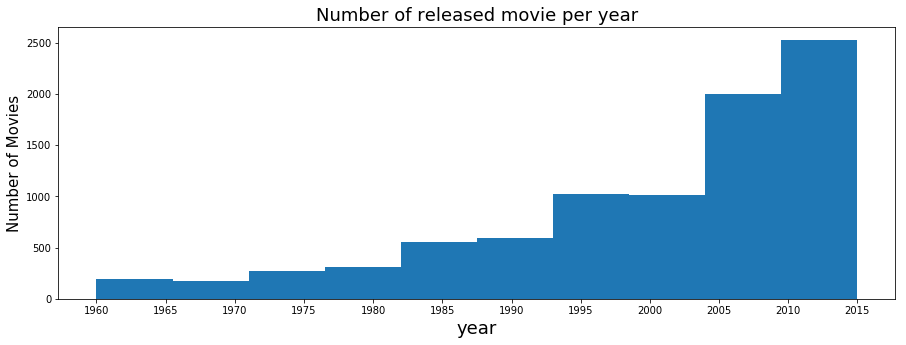

In [25]:
# Q1.1 Is the film market a growing marke over years? (Number of released movie per year)

fig = plt.figure(figsize=(15,5))   
ax = df_movie['release_year'].plot.hist()  
plt.title('Number of released movie per year',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.ylabel('Number of Movies',fontsize=15)
plt.xticks(range(1960, 2017, 5))  
plt.show()

From above graph we can see that, film market is a steady growing market for the last several decades. We can see a boost in the movie industry especially after 1990. 

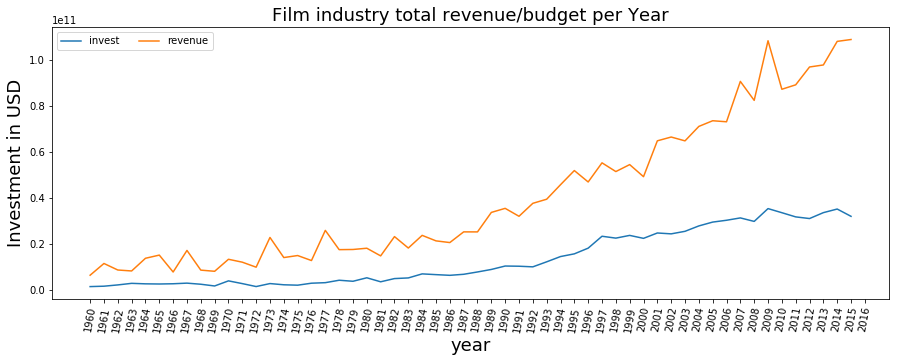

In [26]:
# Q1.2  are films making more and more money over years? (Film industry total revenue/budget per Year)

invest_year= df_meltg.groupby('release_year').sum().budget_adj
revenue_year= df_meltg.groupby('release_year').sum().revenue_adj
fig = plt.figure(figsize=(15,5))   
plt.plot(invest_year)
plt.plot(revenue_year)
plt.title('Film industry total revenue/budget per Year',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.ylabel('Investment in USD',fontsize=18)
plt.xticks(range(1960,2017,1),rotation=80)
plt.legend(['invest','revenue'], loc='best',ncol=2) 
plt.show()


The revenue and budget of film market is also growing fast per year.
However, the return on investment rate for the last decade is around 2.0 which is lower than the greatest ROI rate which happened in 1973 and 1977 with ROI rate:7.0 (see bar chart below). 

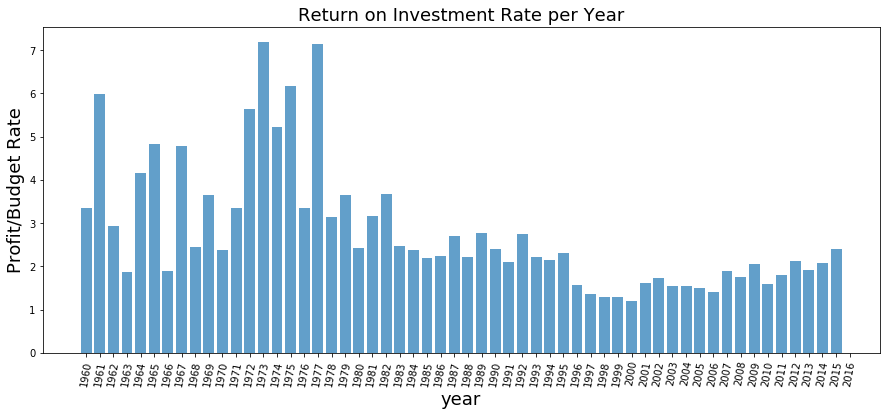

In [39]:
# Q1.3  How about ROI return on investment ? (Return on Investment Rate per Year)
roi_year= (revenue_year-invest_year)/invest_year
fig = plt.figure(figsize=(15,6)) 
plt.bar(roi_year.index,roi_year,alpha = 0.7)
plt.title('Return on Investment Rate per Year',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.ylabel('Profit/Budget Rate',fontsize=18)
plt.xticks(range(1960,2017,1),rotation=80)
plt.show()


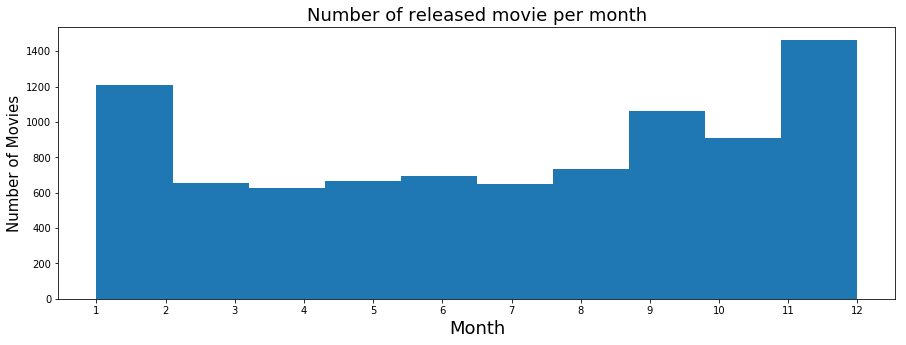

In [54]:
# Q1.4 Is movie market a seasonal market? Which month get the best revenue ?(Number of released movie per month)
fig = plt.figure(figsize=(15,5))   
mon=df_movie['release_month'].plot.hist()
plt.title('Number of released movie per month',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Number of Movies',fontsize=15)
plt.xticks(range(1,13,1))  
plt.show()

As we can see from the above graph that the month with highest released movie is Decemeber. 
However,the total revenue is almost same for movie released on June and movie released on Decemeber as we can see from the below line chart.

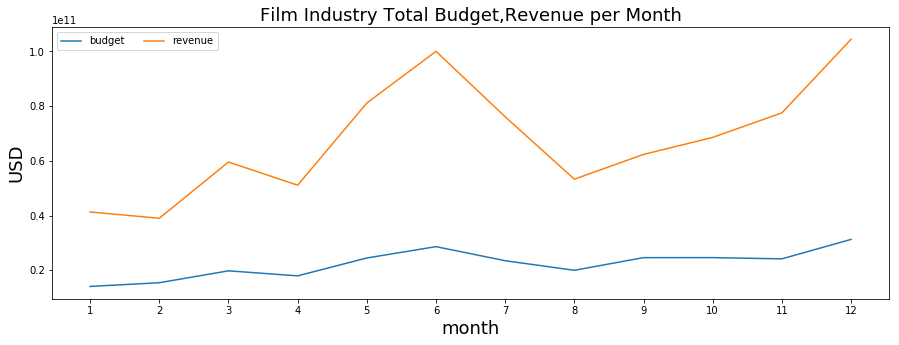

In [55]:
# Q1.5 Which month get the more budget and revenue? (Film Industry Total Budget,Revenue per Month)
invest_month= df_movie.groupby('release_month').sum().budget_adj
revenue_month= df_movie.groupby('release_month').sum().revenue_adj
fig = plt.figure(figsize=(15,5))  
plt.plot(invest_month)
plt.plot(revenue_month)
plt.title('Film Industry Total Budget,Revenue per Month',fontsize=18)
plt.xlabel('month',fontsize=18)
plt.ylabel('USD',fontsize=18)
plt.xticks(range(1,13,1))
plt.legend(['budget','revenue'], loc='best',ncol=2) 
plt.show()

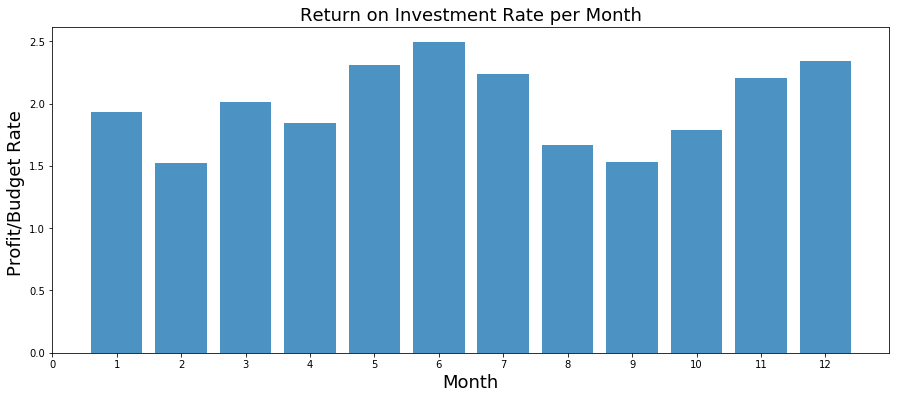

In [56]:
# Q1.6 How about the ROI per month? (Return on Investment Rate per Month)
roi_month= (revenue_month-invest_month)/invest_month
fig = plt.figure(figsize=(15,6)) 
plt.bar(roi_month.index,roi_month,alpha = 0.8)
plt.title('Return on Investment Rate per Month',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.xticks(range(0,13,1))
plt.ylabel('Profit/Budget Rate ',fontsize=18)
plt.show()

As we can see from the bar chart that return on investment rate is almost the same for June and December.

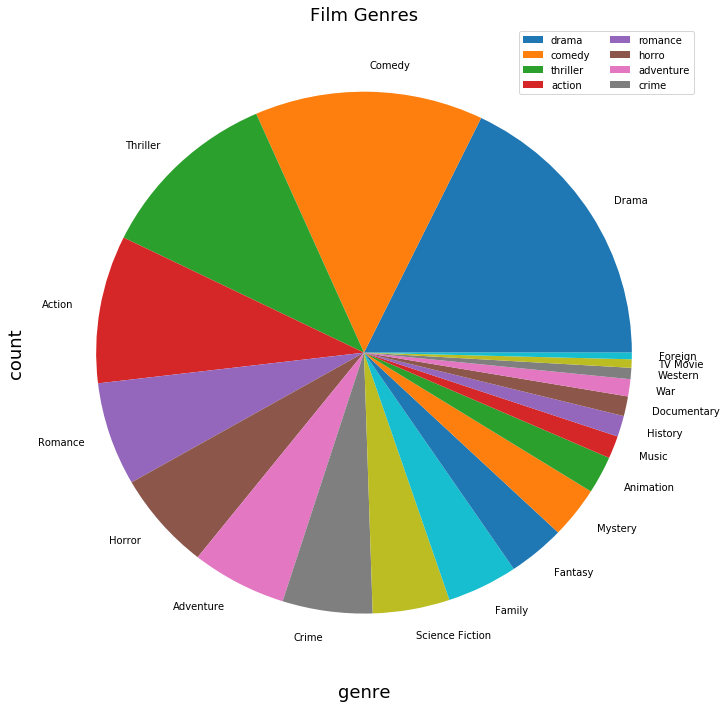

In [58]:
# Q2 Genre and the market -  Which genre is the most popular genre and which one with more ROI?
# Q2.1) Which genre has the most number of movies?
genre = df_meltg['genres'].value_counts()
fig = plt.figure(figsize=(12,12))     
ax = genre.plot.pie()   
plt.title('Film Genres', fontsize=18)   
plt.xlabel('genre', fontsize=18)    
plt.ylabel('count', fontsize=18)   
plt.legend(['drama','comedy','thriller','action','romance','horro','adventure','crime'], loc='best',ncol=2) 
plt.show()

In [32]:
# Q2.2) How about the genre growth over time, which genre is growing faster than the others?

In [61]:
df_meltg1=df_meltg
df_meltg1['number']=df_meltg.release_month/df_meltg.release_month
df_gr = df_meltg1.groupby(['release_year','genres']).sum().number
year_gr = pd.DataFrame(df_gr)

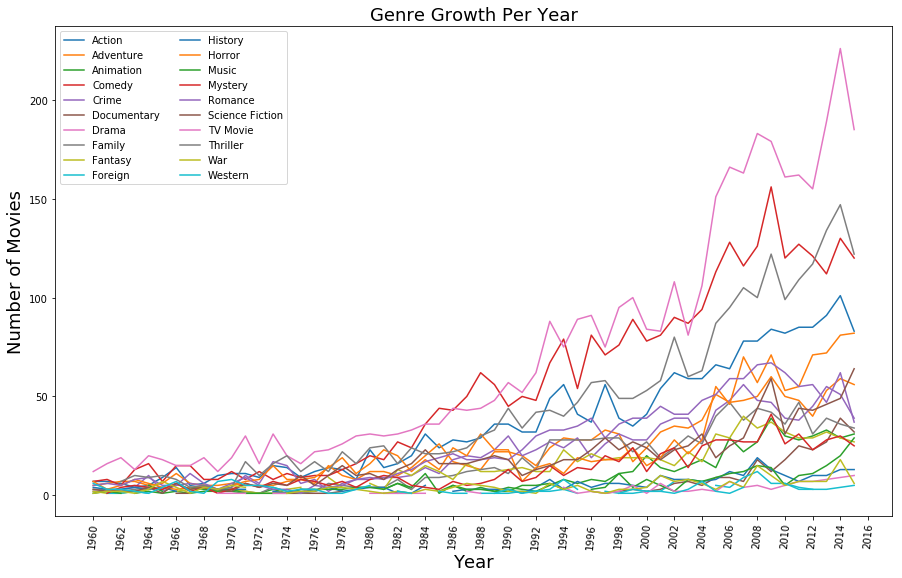

In [48]:
year_grpivot =year_gr.pivot_table(index='release_year',columns='genres',values='number')

fig = plt.figure()  
year_grpivot.plot(figsize=(15,9))
plt.title('Genre Growth Per Year',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Movies',fontsize=18)
plt.xticks(range(1960,2017,2),rotation = 85)
plt.legend(loc='best',ncol=2)
plt.show()

As we can see from the above pie chart that drama genere is the biggest genere in the film industry
and it is also the fast growing genre over the last several decades which is showed from the line chart.

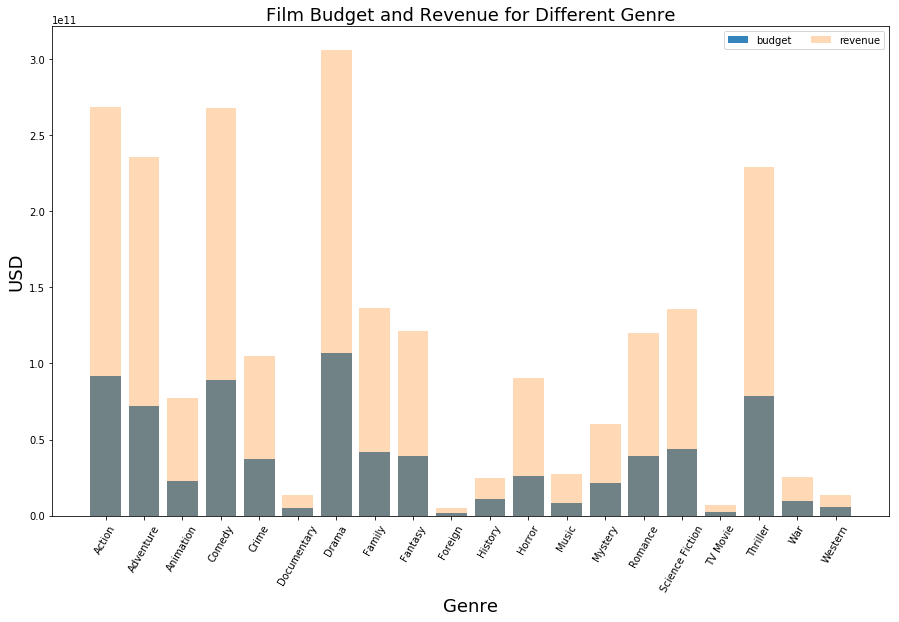

In [49]:
# Q 2.3) Which genre with the most investment, revenue?(Film Budget and Revenue for Different Genre)

genre_invest = df_meltg.groupby('genres').sum().budget_adj
genre_revenue = df_meltg.groupby('genres').sum().revenue_adj
fig = plt.figure(figsize=(15,9))   
plt.bar(genre_invest.index,genre_invest,alpha=0.9)
plt.bar(genre_revenue.index,genre_revenue,alpha=0.3)
plt.xticks(rotation=60)  
plt.title('Film Budget and Revenue for Different Genre', fontsize=18)   
plt.xlabel('Genre', fontsize=18)   
plt.ylabel('USD', fontsize=18)     
plt.xticks()
plt.legend(['budget','revenue'], loc='best',ncol=2) 
plt.show() 

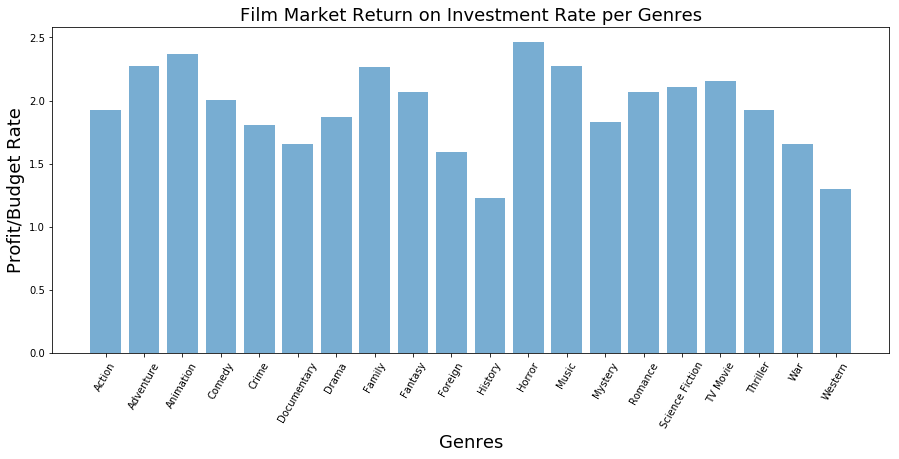

In [50]:
#Q 2.4) Which genre with better ROI? (Film Market Return on Investment Rate per Genres)
genre_roi = (genre_revenue-genre_invest)/genre_invest
fig = plt.figure(figsize=(15,6))  

plt.xticks(rotation=60)  
plt.bar(genre_roi.index,genre_roi,alpha=0.6)
plt.title('Film Market Return on Investment Rate per Genres', fontsize=18)   
plt.xlabel('Genres', fontsize=18)    
plt.ylabel('Profit/Budget Rate',fontsize=18)    
plt.xticks()
plt.show() 

From the Q2.3 graph (Film Budget and Revenue for Different Genre), we can see that action,comedy and drama are top three genres with the most budget. However it is showed from the Q2.4 graph (Film Market Return on Investment Rate per Genres) that animation,family and horror are three top genres with best return on investment rate.

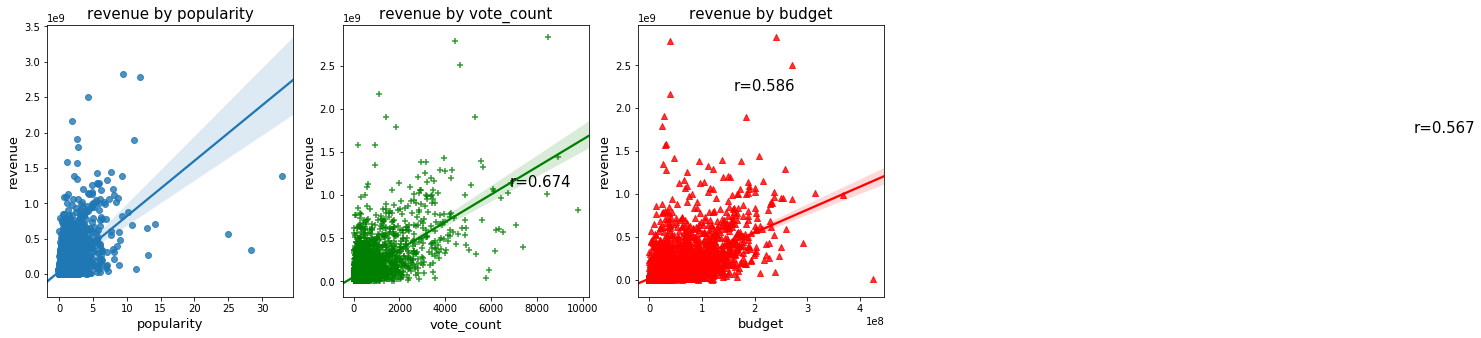

In [97]:
#Q 2.5) Which genre with better ROI? (Film Market Return on Investment Rate per Genres)
df_movie[['popularity','vote_average','vote_count','budget_adj','revenue_adj']].corr()
#the figure is 0.567788 0.191875 0.674696 0.586009.

fig = plt.figure(figsize=(15,5))  
ax1 = plt.subplot(1,3,1)  
ax1 = sns.regplot(x='popularity', y='revenue_adj',data=df_movie, x_jitter=.1)
ax1.text(200,2e9,'r=0.567',fontsize=15)  
plt.title('revenue by popularity',fontsize=15)  
plt.xlabel('popularity',fontsize=13)  
plt.ylabel('revenue',fontsize=13)  
  
ax2 = plt.subplot(1,3,2)  
ax2 = sns.regplot(x='vote_count', y='revenue_adj',data=df_movie, x_jitter=.1,color='g',marker='+')
ax2.text(6800,1.1e9,'r=0.674',fontsize=15)  
plt.title('revenue by vote_count',fontsize=15)  
plt.xlabel('vote_count',fontsize=13)  
plt.ylabel('revenue',fontsize=13)  

ax3 = plt.subplot(1,3,3)  
ax3 = sns.regplot(x='budget_adj',y='revenue_adj',data=df_movie, x_jitter=.1,color='r',marker='^')
ax3.text(1.6e8,2.2e9,'r=0.586',fontsize=15)  
plt.title('revenue by budget',fontsize=15)  
plt.xlabel('budget',fontsize=13)  
plt.ylabel('revenue',fontsize=13)  
fig.savefig('revenue.png') 

From Q 2.5 graph we can see that, revenue is mostly correlative with the total number of vote (green chart), it is secondly related to revenue (red chart),and thirdly correlative to popularity (Blue chart)

<a id='conclusions'></a>
## Conclusions

> From above analysis of TMDb movie data, we can see that movie industry is a fast growing industry over the past 50 years (Q1.1 histgram of number of release movies per year). However, the return on investment rate for the last decade is around 2.0 which is lower than the greatest ROI rate which happened in 1973 and 1977 with ROI rate: 7.0 (see Q1.3 bar graph of Return on Investment Rate per Year). 

> As we can see from the Q1.5 graph (Film Industry Total Budget, Revenue per Month), June and December maybe two of the outstanding months with obvious higher amount of total revenue and ROI rate.

> From the Q2.3 graph (Film Budget and Revenue for Different Genre), we can see that action, comedy and drama are top three genres with the most budget. However it is showed from the Q2.4 graph (Film Market Return on Investment Rate per Genres) that animation, family and horror are three top genres with best return on investment rate.

> The last chart Q2.5 showed that movie revenue may have a correlation with popularity, vote count and movie budget, with different correlation rate 0.567788, 0.674696 and 0.586009.

> For the limitations of this project, as we can see that the null rows were deleted at the beginning of this analysis and I also filled zero revenue and budget with the mean value. These may be improved with some other method to increase the accuracy of this data analysis.
